#Library Imports

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

# Dataset Imports - from Google drive

In [2]:
from google.colab import drive

drive.mount('/content/gdrive/', force_remount=True)

Mounted at /content/gdrive/


In [3]:
raw_data_path = r'/content/gdrive/MyDrive/Datasets/student_assignment.csv'

In [4]:
raw_data = pd.read_csv(raw_data_path)
raw_data.head(5)

,Age,Income,Is Student,Num Children,Temperature,Rating
0,43.0,45893.41,True,0.0,38.2,2.6
1,56.0,69663.07,True,1.0,38.7,3.2
2,NaN,45124.06,False,5.0,36.9,3.9
3,37.0,76724.60,False,2.0,41.6,2.5
4,53.0,58343.03,False,1.0,36.5,3.3


# Exploratory Data Analysis

## Defining EDA function

In [5]:
def get_metadata(dataframe):
    '''Gets all the Metadata Information about the Dataframe'''
    print("\nBASIC INFORMATION\n")
    print(dataframe.info())
    print("=" * 150)
    print("STATISTICAL INFORMATION\n")
    display(dataframe.describe(include='all').T)
    print("=" * 150)
    print("Dataframe Shape\n", dataframe.shape)
    print("=" * 150)
    print("Number of Duplicate Rows\n", dataframe.duplicated().sum())
    print("=" * 150)
    print("NULL Values Check")
    for col in dataframe.columns:
        print(col, dataframe[col].isnull().sum())
    print("=" * 150)
    print("UNIQUE VALUES IN EVERY COLUMN")
    for col in dataframe.columns:
        print(col)
        print(dataframe[col].unique())
        print('-' * 150)
    categorical_cols = [var for var in dataframe.columns if dataframe[var].dtype=='O']
    numerical_cols = [var for var in dataframe.columns if dataframe[var].dtype!='O']
    print("CATEGORICAL FEATURES\n", categorical_cols)
    print("=" * 150)
    print("NUMERICAL FEATURES\n", numerical_cols)
    print("=" * 150)
    print("Negative Valued Column")
    for col in numerical_cols:
        if min(dataframe[col]) < 0:
            print(col)
    print("=" * 150)
    display(dataframe.head(3))

In [6]:
get_metadata(raw_data)


BASIC INFORMATION

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 104 entries, 0 to 103
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Age           103 non-null    float64
 1   Income        104 non-null    float64
 2   Is Student    104 non-null    object 
 3   Num Children  101 non-null    float64
 4   Temperature   104 non-null    float64
 5   Rating        104 non-null    float64
dtypes: float64(5), object(1)
memory usage: 5.0+ KB
None
STATISTICAL INFORMATION



,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Age,103.0,NaN,NaN,NaN,52.932039,66.249567,18.0,31.5,42.0,53.5,511.0
Income,104.0,NaN,NaN,NaN,58456.756442,22150.934058,20955.37,40065.965,58014.56,74489.015,99072.18
Is Student,104,7,True,53,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Num Children,101.0,NaN,NaN,NaN,3.059406,4.046781,0.0,2.0,3.0,4.0,40.0
Temperature,104.0,NaN,NaN,NaN,38.399038,2.08301,35.2,36.7,38.4,39.925,41.9
Rating,104.0,NaN,NaN,NaN,3.295192,1.448426,-3.2,2.6,3.4,4.1,10.9


Dataframe Shape
 (104, 6)
Number of Duplicate Rows
 3
NULL Values Check
Age 1
Income 0
Is Student 0
Num Children 3
Temperature 0
Rating 0
UNIQUE VALUES IN EVERY COLUMN
Age
[ 43.  56.  nan  37.  53.  54. 511.  30.  24.  42.  22.  34.  35.  61.
  39.  47.  31. 301.  55.  59.  51.  64.  20.  27.  63.  18.  36.  26.
  41.  58.  48.  33.  21.  28. 438.  62.  38.  57.  46.  45.  50.  25.
  32.  19.  60.  52.  40.]
------------------------------------------------------------------------------------------------------------------------------------------------------
Income
[45893.41 69663.07 45124.06 76724.6  58343.03 31161.17 44127.02 59721.22
 65193.65 70056.11 70981.93 78454.66 37795.02 97671.61 27089.59 83082.63
 61868.49 59526.59 44835.65 39598.07 57066.26 69136.35 22272.75 73100.81
 20955.37 65847.68 23367.81 84432.94 85264.46 62915.92 25008.63 39196.01
 62398.9  87089.69 54579.63 49679.94 76369.35 21674.49 33270.72 24041.96
 43664.78 50850.48 43902.71 65598.95 64362.63 38894.43 30414.93 8

,Age,Income,Is Student,Num Children,Temperature,Rating
0,43.0,45893.41,True,0.0,38.2,2.6
1,56.0,69663.07,True,1.0,38.7,3.2
2,NaN,45124.06,False,5.0,36.9,3.9


Inference:

*  104 rows, 6 columns
*  3 Duplicate Rows
*   5 Float Columns, 1 Object Columns
    *   Age and Num Children columns are infered as Float column, but should be considered as a Integer column (since it has NaN values, it is infered as Float Column)
    *  Column names contains space, so it can be replaced with '_'
*  Age and Num Childern columns has NULL values
*   From the statistical summary, we can infer the following
    * Age
      *  max(100th percentile) - 511.0 which indicates the presence of error values
    * Num Childern
      *  max(100th percentile) - 40.0 which indicates the presence of error values
    * Rating
      * min(0th percentile) - '-3.2' which is a negative value and indicates the presence of error values
      * max(100th pecentile) - 10.9 which is deviating from the other values and seems to be an error
*  Is Student has error values - ['True' 'False' 'NO' 'Yes' 'false' 'true' 'YES'] - TRUE and FALSE are the only 2 categories

***Since the data is very less, we cannot drop the NULL value columns, instead we try to impute values based on other columns***


# Pre-Processing

## Drop Duplicate rows

In [7]:
raw_data.duplicated().sum()

3

In [8]:
wo_dup_data = raw_data.drop_duplicates()
wo_dup_data.head(3)

,Age,Income,Is Student,Num Children,Temperature,Rating
0,43.0,45893.41,True,0.0,38.2,2.6
1,56.0,69663.07,True,1.0,38.7,3.2
2,NaN,45124.06,False,5.0,36.9,3.9


In [9]:
wo_dup_data.duplicated().sum()

0

## Rename Column Values

In [10]:
wo_dup_data.columns = wo_dup_data.columns.str.replace(' ', '_')
wo_dup_data.head(2)

,Age,Income,Is_Student,Num_Children,Temperature,Rating
0,43.0,45893.41,True,0.0,38.2,2.6
1,56.0,69663.07,True,1.0,38.7,3.2


## Transforming Typo Errors

### Is_Student

In [11]:
wo_dup_data['Is_Student'].unique()

array(['True', 'False', 'NO', 'Yes', 'false', 'true', 'YES'], dtype=object)

In [12]:
wo_dup_data['Is_Student'] = wo_dup_data['Is_Student'].str.upper()
wo_dup_data['Is_Student'].unique()

array(['TRUE', 'FALSE', 'NO', 'YES'], dtype=object)

In [13]:
wo_dup_data = wo_dup_data.replace({'Is_Student' : {'NO' : 'TRUE', 'YES' : 'FALSE'}})
wo_dup_data['Is_Student'].unique()

array(['TRUE', 'FALSE'], dtype=object)

## Imputing NULL Values

### Age - Mean

In [14]:
wo_dup_data[wo_dup_data['Age'].isnull()]

,Age,Income,Is_Student,Num_Children,Temperature,Rating
2,NaN,45124.06,FALSE,5.0,36.9,3.9


In [15]:
imp_age = wo_dup_data.copy()
imp_age['Age'] = imp_age['Age'].fillna(value=imp_age['Age'].mean())
imp_age.head(2)

,Age,Income,Is_Student,Num_Children,Temperature,Rating
0,43.0,45893.41,TRUE,0.0,38.2,2.6
1,56.0,69663.07,TRUE,1.0,38.7,3.2


In [16]:
imp_age.filter(items=[2], axis=0)

,Age,Income,Is_Student,Num_Children,Temperature,Rating
2,53.31,45124.06,FALSE,5.0,36.9,3.9


### Num_Children has error value. So, after processing it, the NULL values can be imputed

## Imputing Error Values

### Num_Children

In [17]:
imp_age[imp_age['Num_Children']>10]

,Age,Income,Is_Student,Num_Children,Temperature,Rating
82,50.0,34652.57,FALSE,40.0,39.1,3.2


Replacing the values when Num_Children>10 with NULL

In [18]:
error_childno = imp_age.copy()
error_childno['Num_Children'] = error_childno['Num_Children'].where(error_childno['Num_Children'].between(0,10))
error_childno.filter(items=[82], axis=0)

,Age,Income,Is_Student,Num_Children,Temperature,Rating
82,50.0,34652.57,FALSE,NaN,39.1,3.2


### Imputing NULL in Num_Children - Median

In [19]:
error_childno[error_childno['Num_Children'].isnull()]

,Age,Income,Is_Student,Num_Children,Temperature,Rating
19,301.0,39598.07,TRUE,NaN,40.0,3.3
37,58.0,21674.49,TRUE,NaN,36.6,1.2
58,45.0,72280.19,TRUE,NaN,36.1,4.2
82,50.0,34652.57,FALSE,NaN,39.1,3.2


In the 19th indexed row, there is an Error Value in Age column and NULL value in Num_Children column. So, dropping it.

In [38]:
imp_child = error_childno.copy()
imp_child_drop_error = imp_child.loc[~((imp_child['Age']>100) & (imp_child['Num_Children'].isnull()))]
imp_child_drop_error.head(2)


,Age,Income,Is_Student,Num_Children,Temperature,Rating
0,43.0,45893.41,TRUE,0.0,38.2,2.6
1,56.0,69663.07,TRUE,1.0,38.7,3.2


In [39]:
imp_child_drop_error.filter(items=[19], axis=0)

,Age,Income,Is_Student,Num_Children,Temperature,Rating


In [40]:
imp_child = imp_child_drop_error.copy()
imp_child.fillna(value=imp_child['Num_Children'].median(), inplace=True)
imp_child.head(3)

,Age,Income,Is_Student,Num_Children,Temperature,Rating
0,43.00,45893.41,TRUE,0.0,38.2,2.6
1,56.00,69663.07,TRUE,1.0,38.7,3.2
2,53.31,45124.06,FALSE,5.0,36.9,3.9


In [41]:
imp_child.filter(items=[19,37,58,82], axis=0)

,Age,Income,Is_Student,Num_Children,Temperature,Rating
37,58.0,21674.49,TRUE,3.0,36.6,1.2
58,45.0,72280.19,TRUE,3.0,36.1,4.2
82,50.0,34652.57,FALSE,3.0,39.1,3.2


### Age

In [42]:
imp_child[imp_child['Age']>100]

,Age,Income,Is_Student,Num_Children,Temperature,Rating
7,511.0,59721.22,TRUE,0.0,41.9,1.2
47,438.0,87051.70,FALSE,3.0,37.3,2.7


Assuming the 3rd char in Age as Typo

In [43]:
error_age = imp_child.copy()
error_age['Age'] = error_age['Age'].astype('str').str[:2].astype(int)
error_age.filter(items=[2,7,47], axis=0)

,Age,Income,Is_Student,Num_Children,Temperature,Rating
2,53,45124.06,FALSE,5.0,36.9,3.9
7,51,59721.22,TRUE,0.0,41.9,1.2
47,43,87051.70,FALSE,3.0,37.3,2.7


### Rating

In [44]:
error_age[(error_age['Rating']<0) | (error_age['Rating']>10)]

,Age,Income,Is_Student,Num_Children,Temperature,Rating
57,48,86009.55,FALSE,5.0,37.8,-3.2
99,42,46673.04,FALSE,5.0,38.8,10.9


In [45]:
error_rating = error_age.copy()
error_rating['Rating'] = error_age['Rating'].where(error_age['Rating'].between(0,10))

In [46]:
error_rating[(error_rating['Rating']<0) | (error_rating['Rating']>10)]

,Age,Income,Is_Student,Num_Children,Temperature,Rating


In [47]:
error_rating[error_rating['Rating'].isnull()]

,Age,Income,Is_Student,Num_Children,Temperature,Rating
57,48,86009.55,FALSE,5.0,37.8,NaN
99,42,46673.04,FALSE,5.0,38.8,NaN


Imputing NULL in Rating based on median and GroupBy on Is_Student column

In [48]:
error_rating['Rating'] = error_rating['Rating'].fillna(error_rating.groupby(['Is_Student'])['Rating'].transform('median'))
error_rating.filter(items=[57,99], axis=0)

,Age,Income,Is_Student,Num_Children,Temperature,Rating
57,48,86009.55,FALSE,5.0,37.8,3.2
99,42,46673.04,FALSE,5.0,38.8,3.2


## Type cast

In [59]:
error_rating.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 100 entries, 0 to 101
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Age           100 non-null    int64  
 1   Income        100 non-null    float64
 2   Is_Student    100 non-null    object 
 3   Num_Children  100 non-null    float64
 4   Temperature   100 non-null    float64
 5   Rating        100 non-null    float64
dtypes: float64(4), int64(1), object(1)
memory usage: 9.5+ KB


### Num_Children

In [60]:
cast_data = error_rating.astype({'Num_Children': 'int64'})
cast_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 100 entries, 0 to 101
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Age           100 non-null    int64  
 1   Income        100 non-null    float64
 2   Is_Student    100 non-null    object 
 3   Num_Children  100 non-null    int64  
 4   Temperature   100 non-null    float64
 5   Rating        100 non-null    float64
dtypes: float64(3), int64(2), object(1)
memory usage: 9.5+ KB


# Outlier Detection

In [61]:
data = cast_data.copy()

## Age

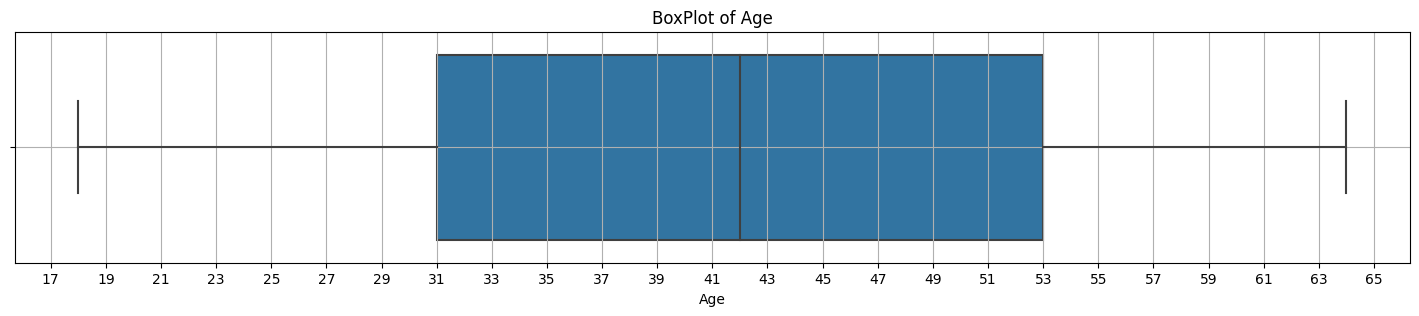

In [62]:
plt.figure(figsize=(18,3))
plt.title('BoxPlot of Age')
sns.boxplot(x = data['Age'])
plt.grid()
plt.xticks(np.arange(17, 66, step=2))
plt.show()

## Income

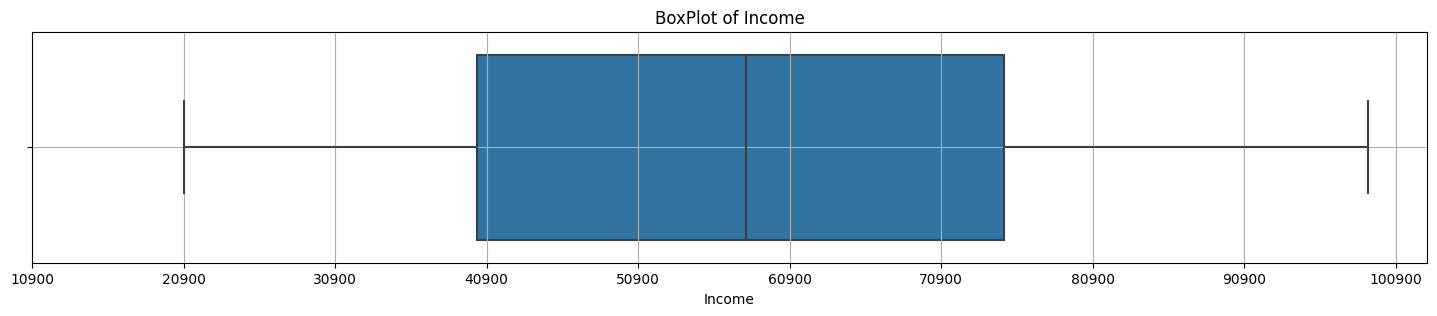

In [63]:
plt.figure(figsize=(18,3))
plt.title('BoxPlot of Income')
sns.boxplot(x = data['Income'])
plt.grid()
plt.xticks(np.arange(10900, 100905, step=10000))
plt.show()

## Num_Children

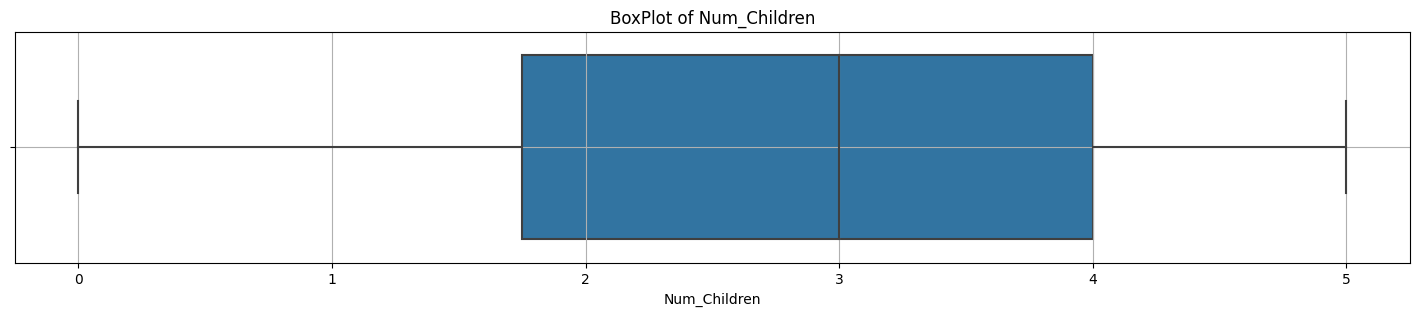

In [64]:
plt.figure(figsize=(18,3))
plt.title('BoxPlot of Num_Children')
sns.boxplot(x = data['Num_Children'])
plt.grid()
plt.xticks(np.arange(0, 6, step=1))
plt.show()

## Temperature

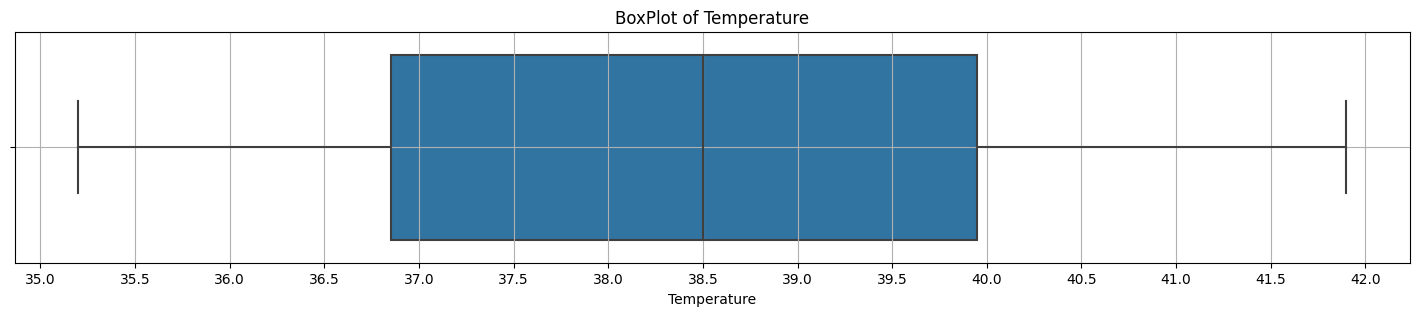

In [65]:
plt.figure(figsize=(18,3))
plt.title('BoxPlot of Temperature')
sns.boxplot(x = data['Temperature'])
plt.grid()
plt.xticks(np.arange(35, 42.5, step=0.5))
plt.show()

## Rating

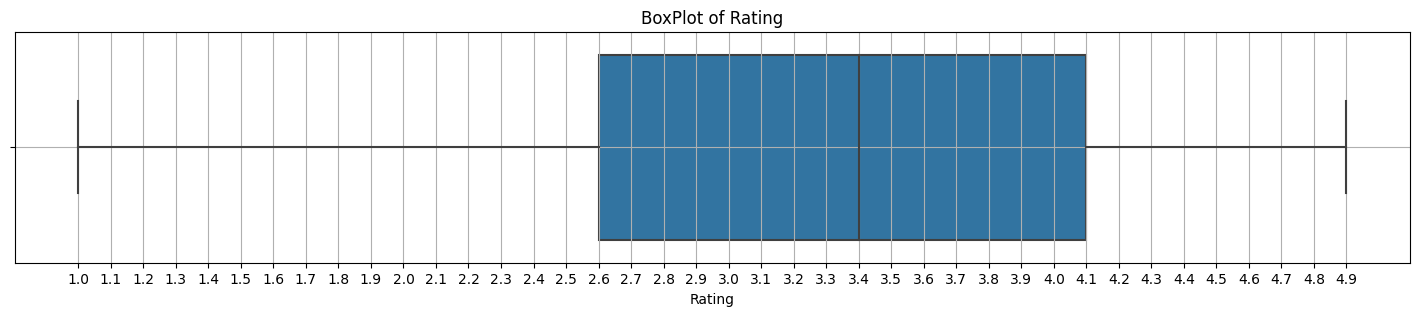

In [67]:
plt.figure(figsize=(18,3))
plt.title('BoxPlot of Rating')
sns.boxplot(x = data['Rating'])
plt.grid()
plt.xticks(np.arange(1, 5, step=0.1))
plt.show()

# Final Data

In [68]:
get_metadata(data)


BASIC INFORMATION

<class 'pandas.core.frame.DataFrame'>
Int64Index: 100 entries, 0 to 101
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Age           100 non-null    int64  
 1   Income        100 non-null    float64
 2   Is_Student    100 non-null    object 
 3   Num_Children  100 non-null    int64  
 4   Temperature   100 non-null    float64
 5   Rating        100 non-null    float64
dtypes: float64(3), int64(2), object(1)
memory usage: 9.5+ KB
None
STATISTICAL INFORMATION



,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Age,100.0,NaN,NaN,NaN,42.28,12.808678,18.0,31.0,42.0,53.0,64.0
Income,100.0,NaN,NaN,NaN,58914.1993,22284.913716,20955.37,40254.5925,58014.56,75085.065,99072.18
Is_Student,100,2,TRUE,53,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Num_Children,100.0,NaN,NaN,NaN,2.65,1.585127,0.0,1.75,3.0,4.0,5.0
Temperature,100.0,NaN,NaN,NaN,38.444,2.084009,35.2,36.85,38.5,39.95,41.9
Rating,100.0,NaN,NaN,NaN,3.295,1.068122,1.0,2.6,3.4,4.1,4.9


Dataframe Shape
 (100, 6)
Number of Duplicate Rows
 0
NULL Values Check
Age 0
Income 0
Is_Student 0
Num_Children 0
Temperature 0
Rating 0
UNIQUE VALUES IN EVERY COLUMN
Age
[43 56 53 37 54 51 30 24 42 22 34 35 61 39 47 31 55 59 64 20 27 63 18 36
 26 41 58 48 33 21 28 62 38 57 46 45 50 25 32 19 60 52 40]
------------------------------------------------------------------------------------------------------------------------------------------------------
Income
[45893.41 69663.07 45124.06 76724.6  58343.03 31161.17 44127.02 59721.22
 65193.65 70056.11 70981.93 78454.66 37795.02 97671.61 27089.59 83082.63
 61868.49 59526.59 44835.65 57066.26 69136.35 22272.75 73100.81 20955.37
 65847.68 23367.81 84432.94 85264.46 62915.92 25008.63 39196.01 62398.9
 87089.69 54579.63 49679.94 76369.35 21674.49 33270.72 24041.96 43664.78
 50850.48 43902.71 65598.95 64362.63 38894.43 30414.93 87051.7  39369.34
 98251.73 44956.75 99072.18 36513.84 67377.82 72190.97 61217.82 80554.28
 86009.55 72280.19 74656.97 

,Age,Income,Is_Student,Num_Children,Temperature,Rating
0,43,45893.41,TRUE,0,38.2,2.6
1,56,69663.07,TRUE,1,38.7,3.2
2,53,45124.06,FALSE,5,36.9,3.9
